## ASSIGNMENT 03: BASIC STATS 1


## Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset


Introduction 
* To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis. Descriptive Analytics for Numerical Columns 
* Objective: To compute and analyze basic statistical measures for numerical columns in the dataset. 
* Steps: Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library). Identify numerical columns in the dataset. Calculate the mean, median, mode, and standard deviation for these columns. Provide a brief interpretation of these statistics. Data Visualization 
* Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset. 
* Histograms: Plot histograms for each numerical column. Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.
* Box Plots: Create boxplots for numerical variables to identify outliers and the interquartile range. Discuss any findings, such as extreme values or unusual distributions.
* Bar Chart Analysis for Categorical Column: Identify categorical columns in the dataset. Create bar charts to visualize the frequency or count of each category. Analyze the distribution of categories and provide insights.

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [4]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [5]:
numerical_col = df.select_dtypes(include=['int', 'float']).columns

In [6]:
numerical_col

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [8]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [9]:
df.isnull().any()

Date                 False
Day                  False
SKU                  False
City                 False
Volume               False
BU                   False
Brand                False
Model                False
Avg Price            False
Total Sales Value    False
Discount Rate (%)    False
Discount Amount      False
Net Sales Value      False
dtype: bool

In [11]:
df.size

5850

In [18]:
stats = {}
for column in numerical_col:
    stats[column] = {
        'Mean' : df[column].mean(),
        'Median': df[column].median(),
        'Mode' : df[column].mode()[0],
        'STD' : df[column].std()
    }
for column, values in stats.items():
    print(f"\n{column}:")
    for stat, value in values.items():
        print(f"{stat}: {value}")


Volume:
Mean: 5.066666666666666
Median: 4.0
Mode: 3
STD: 4.231602391213926

Avg Price:
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
STD: 18079.90483993645

Total Sales Value:
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
STD: 50535.07417255328

Discount Rate (%):
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
STD: 4.220602153325511

Discount Amount:
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
STD: 4509.9029633539985

Net Sales Value:
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
STD: 46358.656624066934


##### Volume:
* Mean: 5.066 - The volume of sales transactions is around 5.066 on average.
* Median: 4.00 - Half of the transactions have a volume of 4.00.
* Mode: 3.00 - The most common volume value is 3.00.
* STD: 4.231 - The volume values are deviated from the mean by approximately 4.231 units on average.
##### Avg Price:
* Mean: 10453.43 - On average, the price of products sold is around 10453.43.
* Median: 1450.00 - Half of the products were sold at a price of 1450.00 or less.
* Mode: 400.00 - The most common price is 400.00.
* STD: 18079.90 - The prices are widely deviated from the mean by approximately 18079.90.
##### Total Sales Value:
* Mean: 33812.835 - The average total sales value is around 33812.835.
* Median: 5700.00 - Half of the transactions resulted in a total sales value of 5700.00 or less.
* Mode: 24300.00 - The most common total sales value is 24300.00.
* STD: 50535.074 - The total sales values vary considerably around the mean with a standard deviation of approximately 50535.074.
##### Discount Rate (%):
* Mean: 15.155% - The average discount rate applied to transactions is approximately 15.155%.
* Median: 16.577% - Half of the transactions had a discount rate of 16.577% or less.
* Mode: 5.007% - The most common discount rate is 5.007%.
* STD: 4.22 - The discount rates vary around the mean by approximately 4.22 percentage points.
##### Discount Amount:
* Mean: 3346.336 - The average discount amount applied to transactions is around 3346.336.
* Median: 988.93 - Half of the transactions had a discount amount of 988.93 or less.
* Mode: 69.18 - The most common discount amount is 69.18.
* STD: 4509.90 - The discount amounts are away from the mean by approximately 4509.90.
##### Net Sales Value:
* Mean: 30466.34 - The average net sales value (after applying discounts) is approximately 30466.34.
* Median: 4677.788 - Half of the transactions resulted in a net sales value of 4677.788.
* Mode: 326.97 - The most common net sales value is 326.97.
* STD: 46358.656 - The net sales values vary considerably around the mean with a standard deviation of approximately 46358.656.

# Data Visualizations

* Histograms:

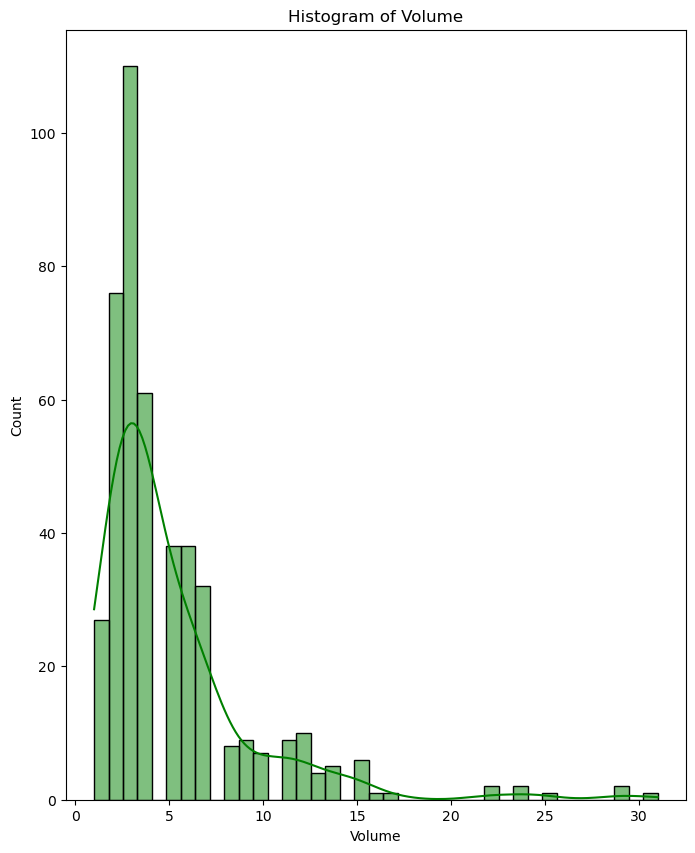

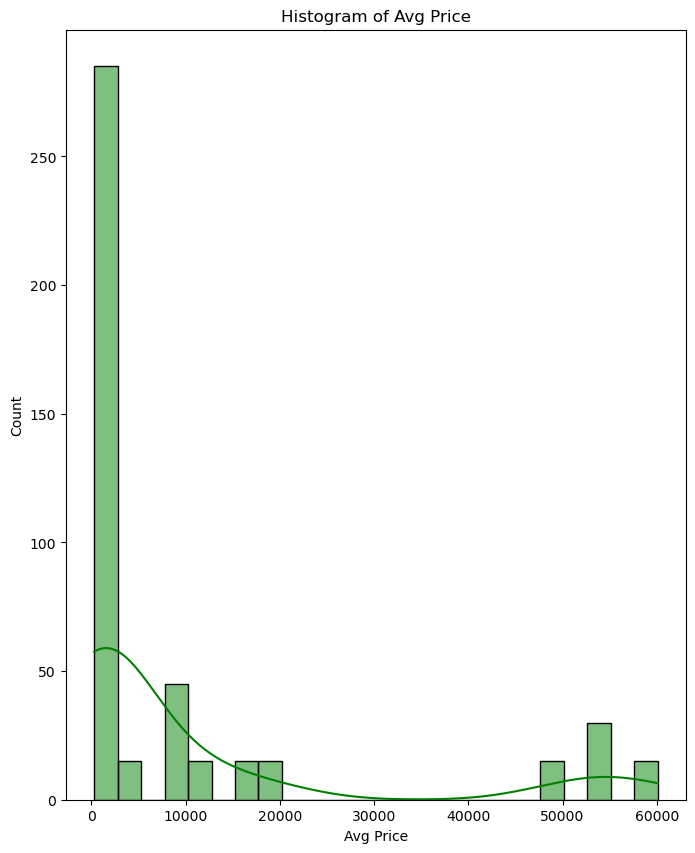

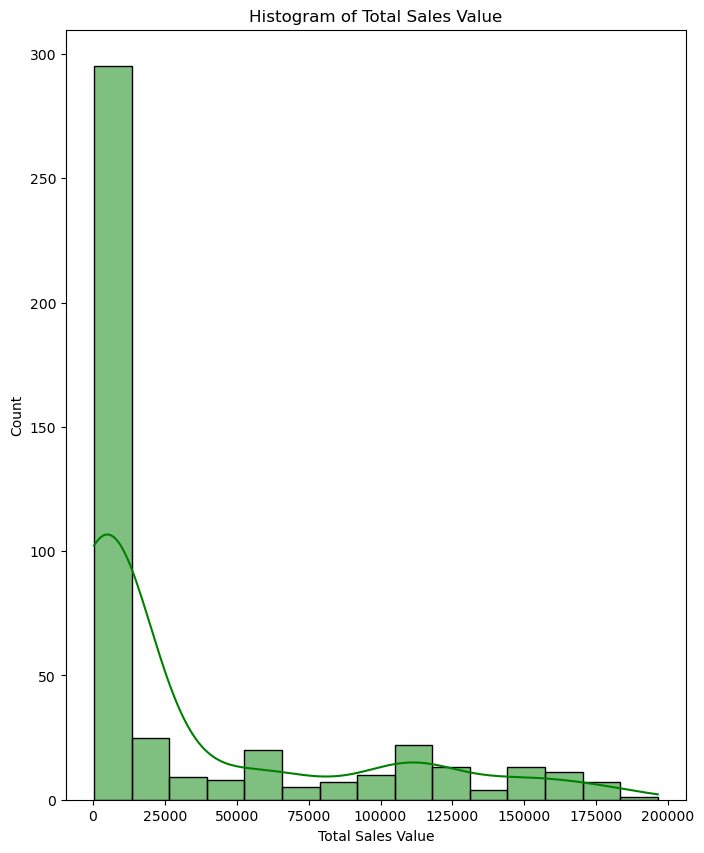

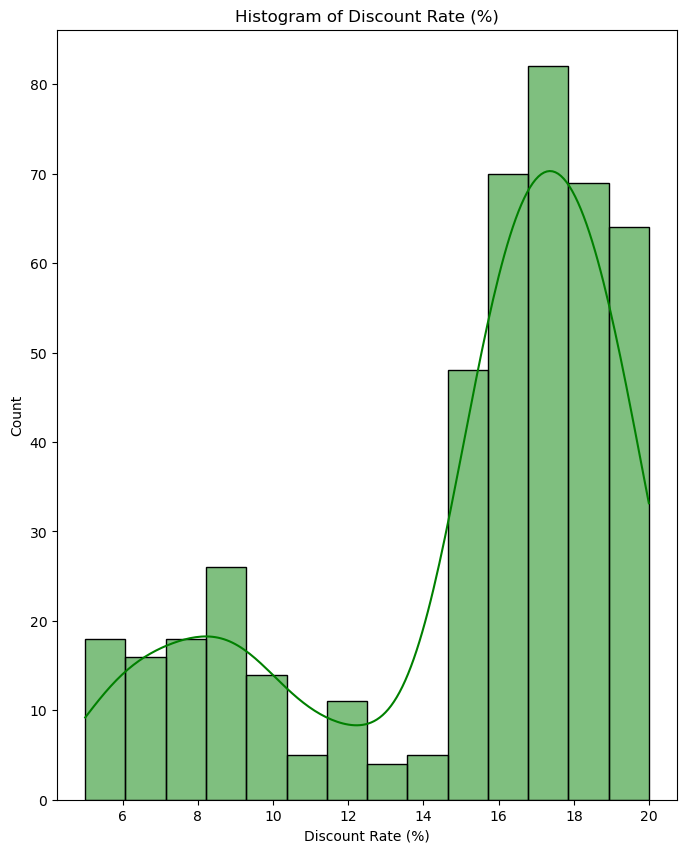

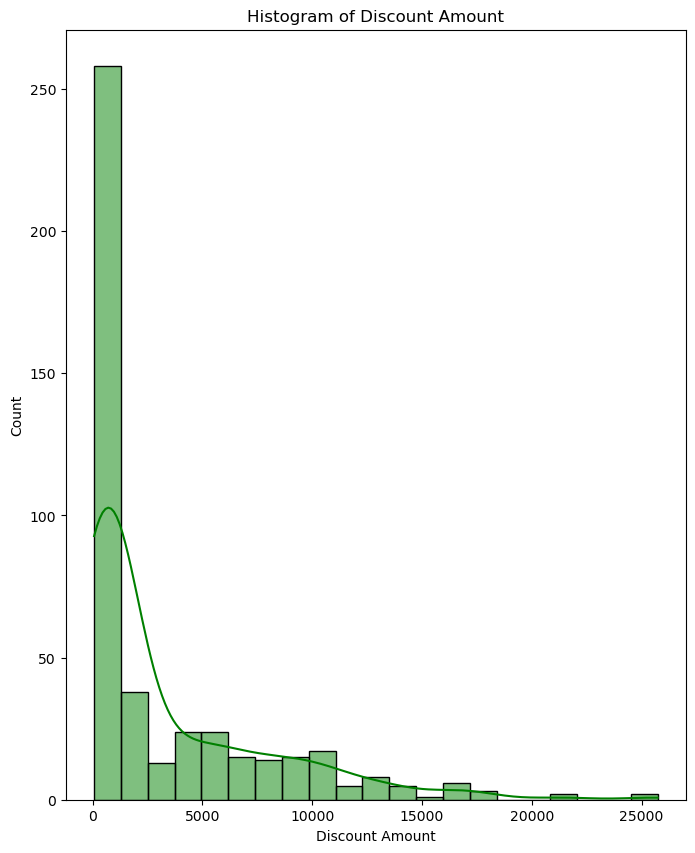

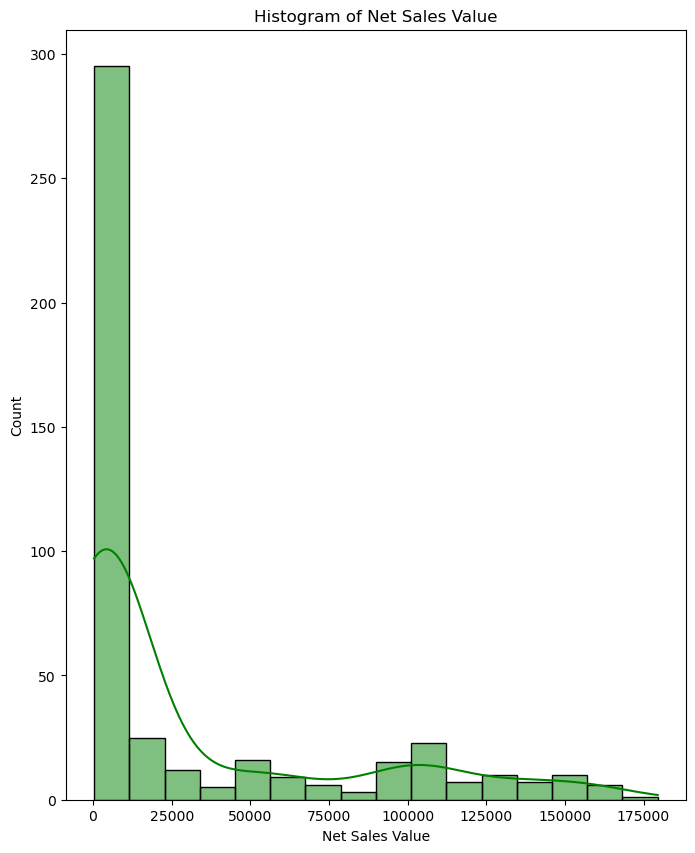

In [21]:
for column in numerical_col:
    plt.figure(figsize=(8,10))
    sns.histplot(data=df,x=column,kde=True,color='green')
    plt.title(f"Histogram of {column}")
    plt.show

* Boxplots:

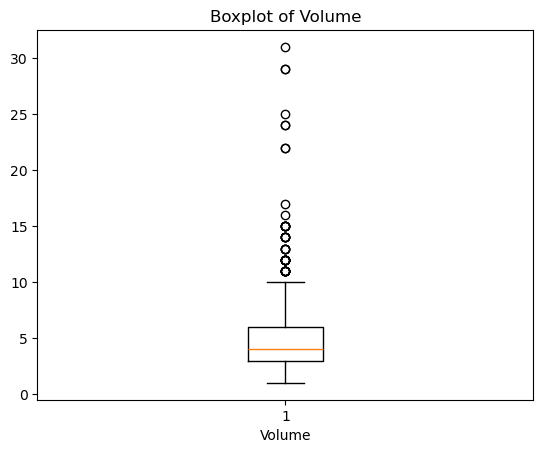

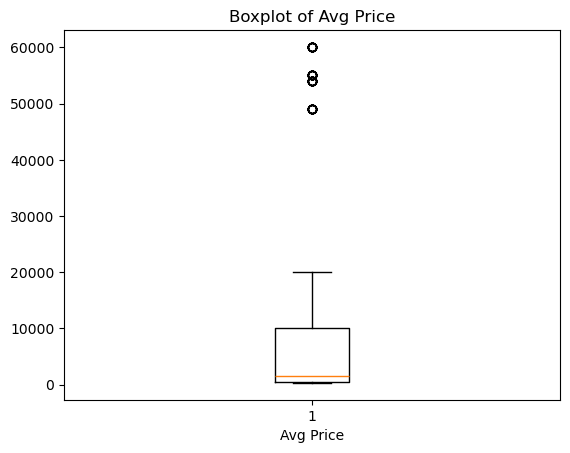

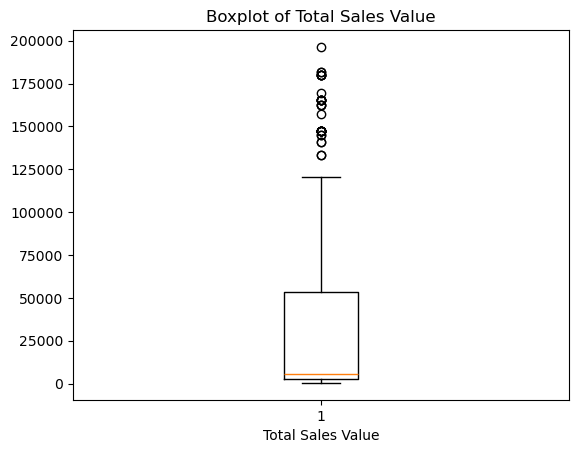

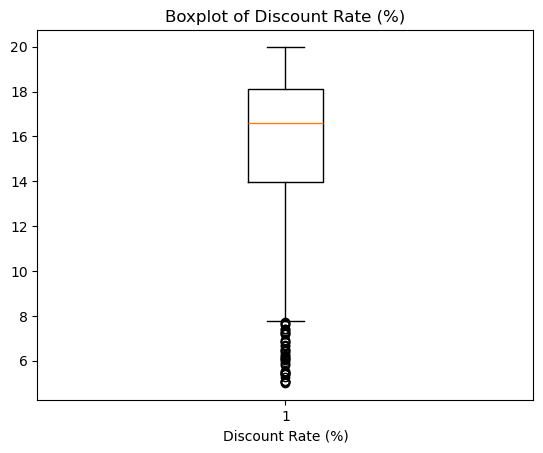

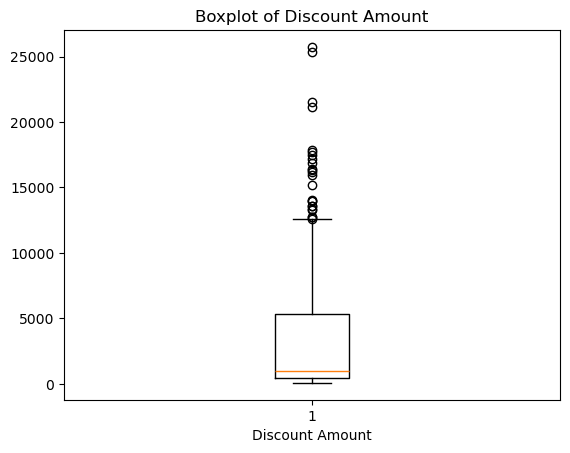

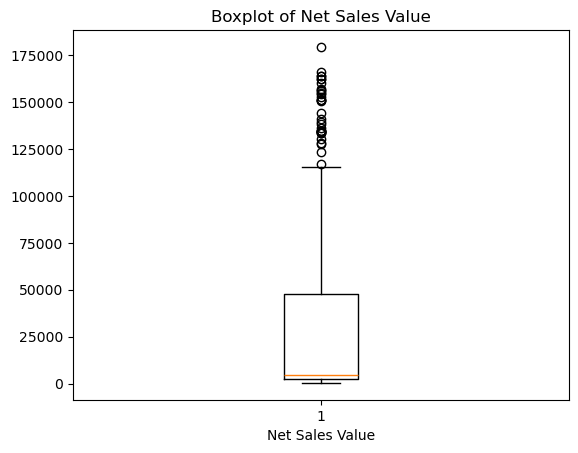

In [22]:
for column in numerical_col:
    plt.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

We can see that every numeric column has an outlier while we look at boxplot.

## Bar Chart Analysis

In [23]:
categorical_col = df.select_dtypes(include = ['object']).columns

In [24]:
categorical_col

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [25]:
df[categorical_col]

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


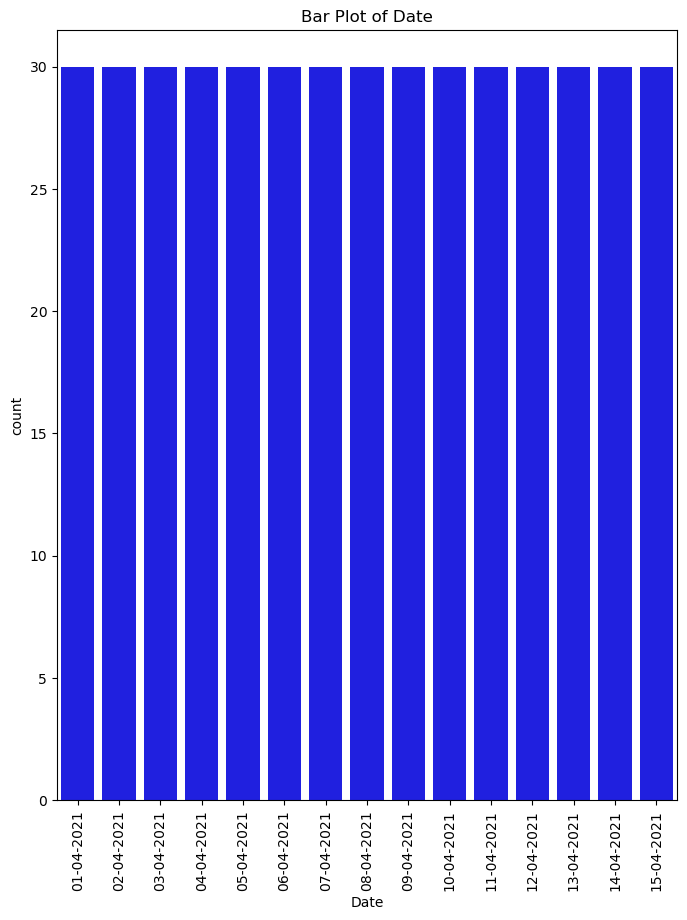

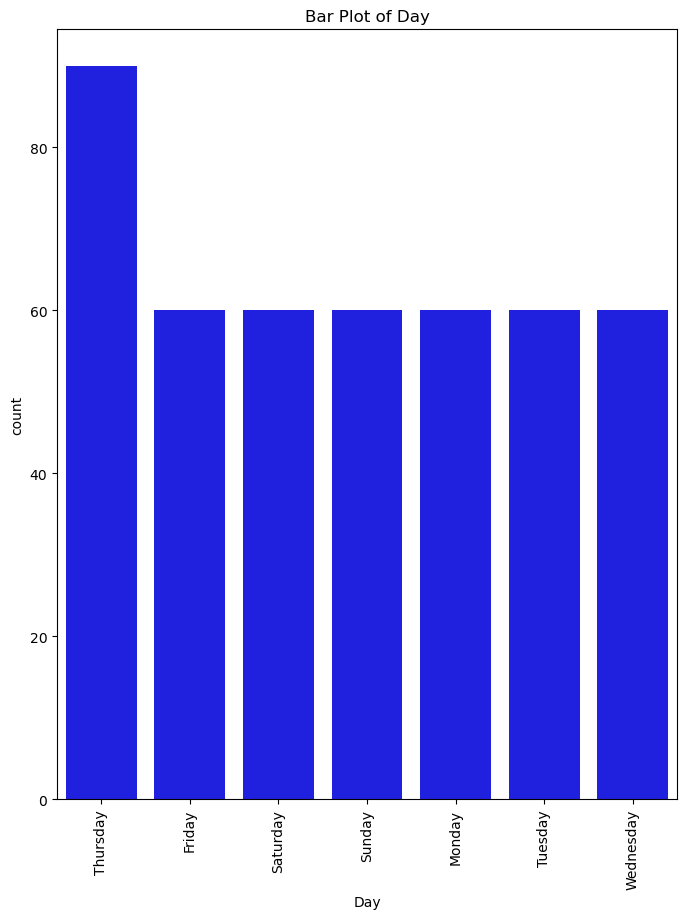

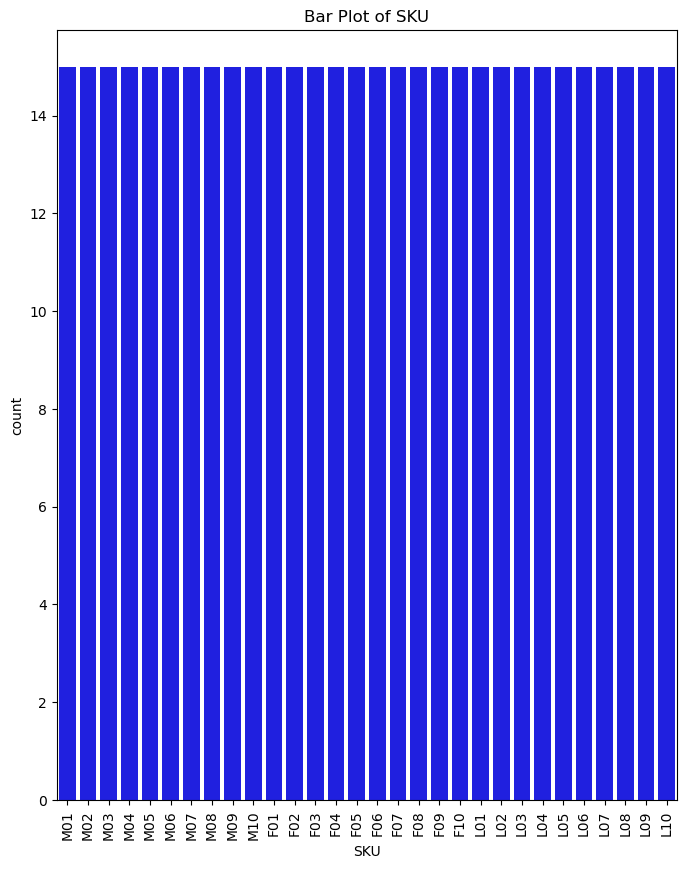

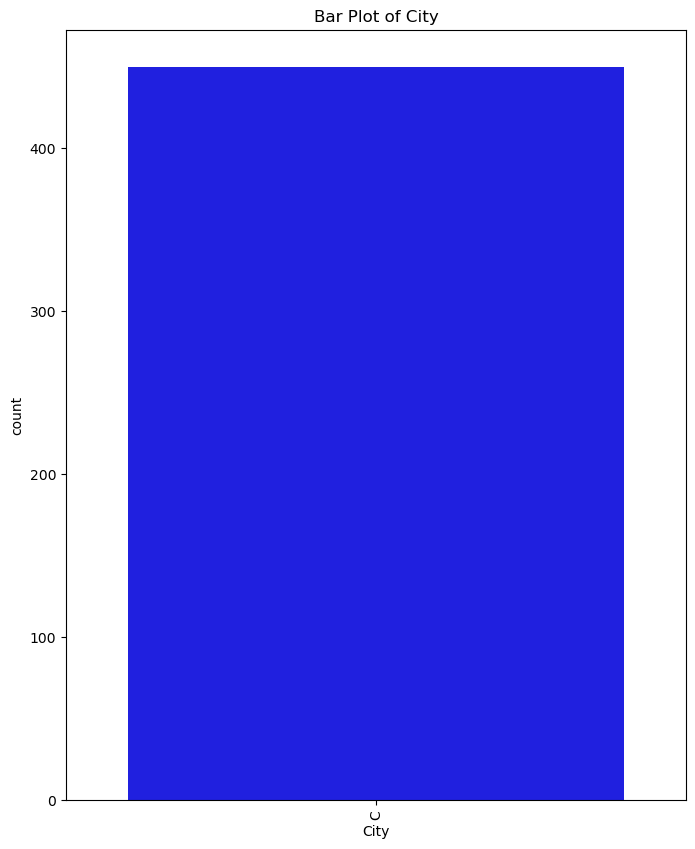

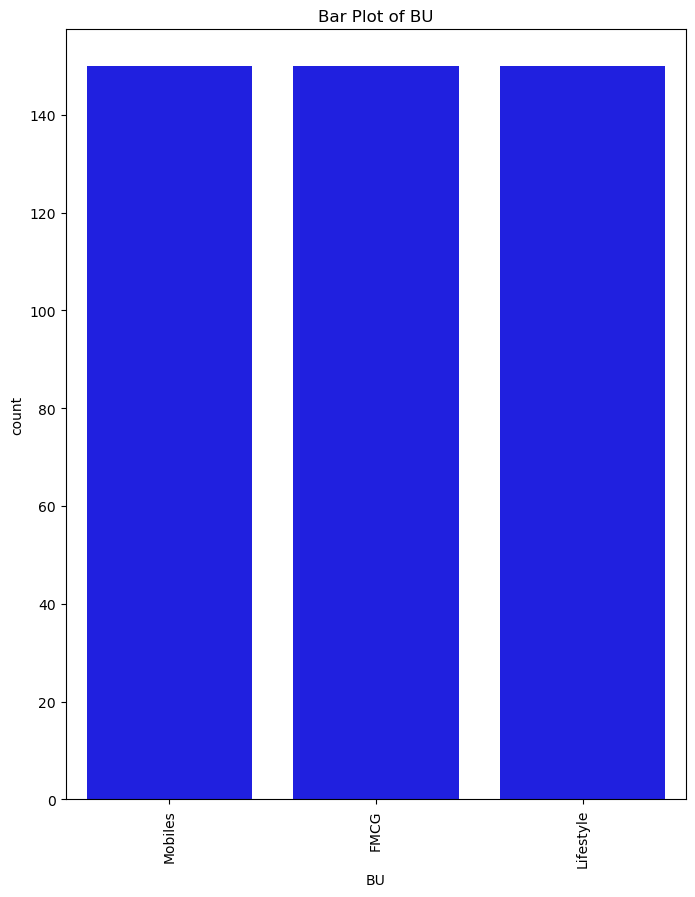

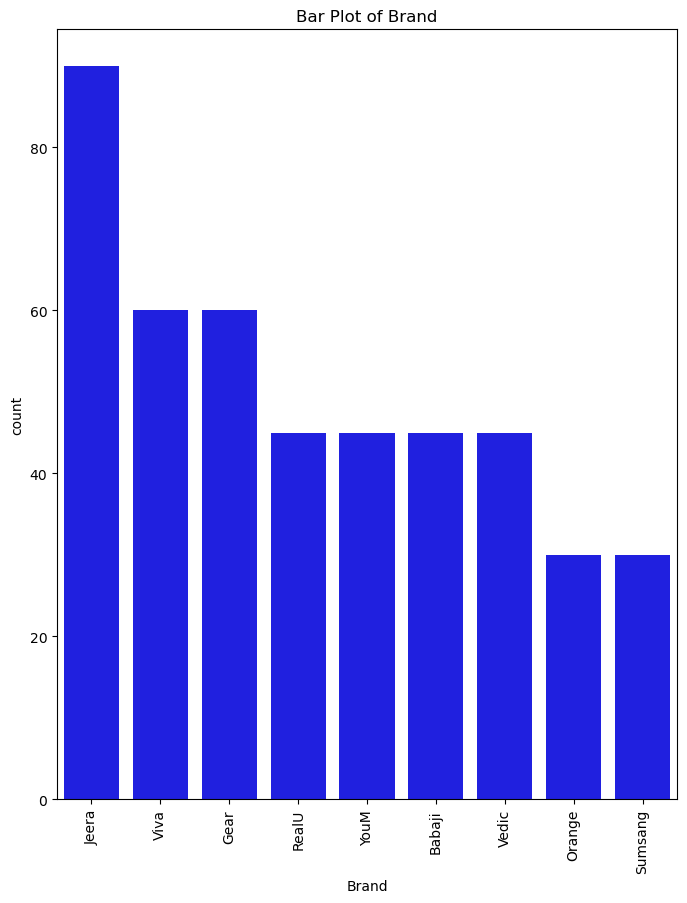

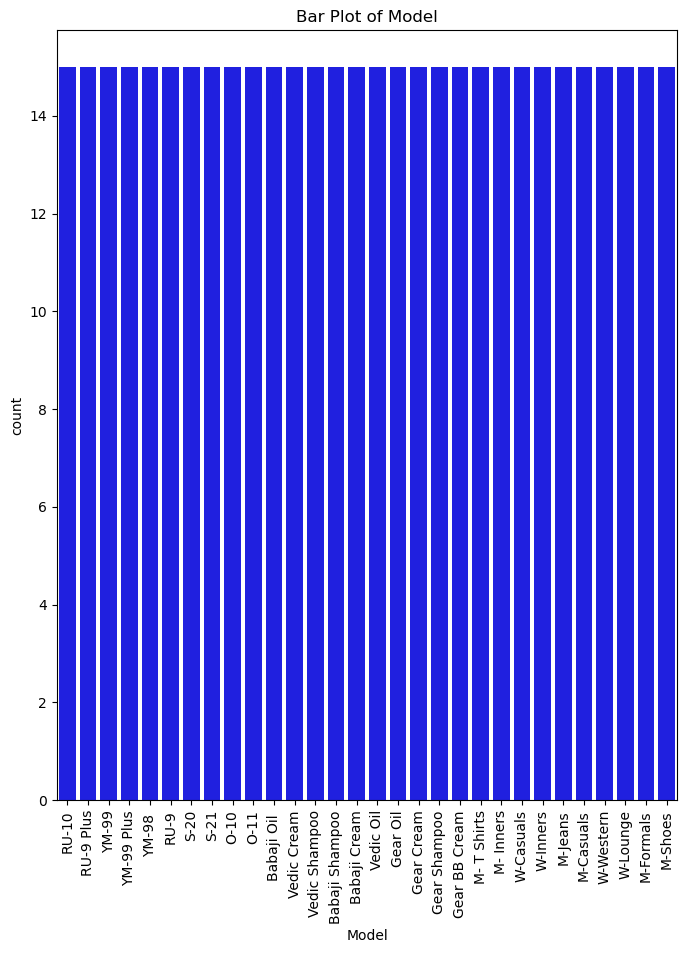

In [28]:
for column in categorical_col:
    plt.figure(figsize=(8,10))
    sns.countplot(data=df,x=column,color='blue',order=df[column].value_counts().index)
    plt.title(f"Bar Plot of {column}")
    plt.xlabel(column)
    plt.ylabel('count')
    plt.xticks(rotation=90)
    plt.show()


3. Data Visualization
a. Histograms

Purpose: To visualize how numerical columns are distributed.

Findings:

A histogram shows whether the data is normally distributed or skewed.

Presence of long tails indicates outliers or skewness.

For example, “Sales” might be positively skewed if few transactions have very high sales values.

b. Box Plots

Purpose: To identify outliers and understand data spread through quartiles.

Findings:

The box represents the middle 50% of the data.

Whiskers show the range of typical values.

Dots outside whiskers represent outliers.

If the box is not centered, it means data is skewed.

c. Bar Charts for Categorical Columns

Purpose: To visualize frequency/count for each category (like Region, Product Type, or Segment).

Findings:

Categories with taller bars occur more frequently.

Example: If “East Region” has the highest bar, it means most sales occurred there.

Helps identify dominant categories and uneven data distribution.